In this notebook, we'll use a KNN classifier and the 3 second features data of the GTZAN dataset. It includes 59 different features for 3 second snippets of songs and the true genres/labels of each sample. After performing feature selection, normalization, and regularization are performed as needed, the resulting accuracy of the KNN classifier will be compared to the results of the CNN on the spectrogram data.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Import data
features_df = pd.read_csv("data/features_3_sec.csv")

In [3]:
#data exploration
features_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


Since we've been working with numpy in this class, we converted the dataframe to a np array.

In [4]:
features = features_df.to_numpy() 
features.shape

(9990, 60)

In [5]:
#slicing data
features_no_filenames = features[:,1:]
filenames = features[:,0]
X = features_no_filenames[:,:-1]
y = features[:,-1]

In [6]:
#split into train 60%, valid 20%, and test 20% by using sklearn's train_test_split twice in order to get a validation set as well
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [7]:
#knn without any feature selection, etc
KNNClassifier = KNeighborsClassifier(n_neighbors=5, weights='distance')  
KNNClassifier.fit(X_train,y_train)
y_pred_valid = KNNClassifier.predict(X_valid)
sklearn.metrics.accuracy_score(y_valid,y_pred_valid)

0.28128128128128127

best accuracy k: 43


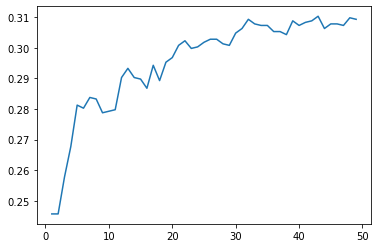

In [8]:
#find best k
#one says sqrt N = ~31
ks = [i for i in range(1,50)]
accs = []

for k in ks:
    KNNClassifier = KNeighborsClassifier(n_neighbors=k,weights='distance')  
    KNNClassifier.fit(X_train,y_train)
    y_pred_valid = KNNClassifier.predict(X_valid)
    accs.append(sklearn.metrics.accuracy_score(y_valid,y_pred_valid))
print("best accuracy k:",ks[np.argmax(accs)])
plt.plot(ks,accs)

Let's pick k = 30 for now, since it's close to the sqrt of the number of samples.

In [9]:
#test
KNNClassifier = KNeighborsClassifier(n_neighbors=30,weights='distance')  
KNNClassifier.fit(X_train,y_train)
y_pred_test = KNNClassifier.predict(X_test)
print("Test Accuracy:",sklearn.metrics.accuracy_score(y_test,y_pred_test))

Test Accuracy: 0.2972972972972973


Now, we perform feature scaling and selection.

In [10]:
scaler = StandardScaler()
scaler.fit(X)
X_normal = scaler.transform(X)

In [11]:
#use sklearn PCA, use a diff method -- currently not improving results, make note in milestone 3
pca = PCA(n_components=15) 
pca.fit(X)
X_select = pca.transform(X_normal)
X_select.shape

(9990, 15)

In [16]:
#split into train 60%, valid 20%, and test 20% by using sklearn's train_test_split twice in order to get a validation set as well
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_select, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)

best accuracy k: 4


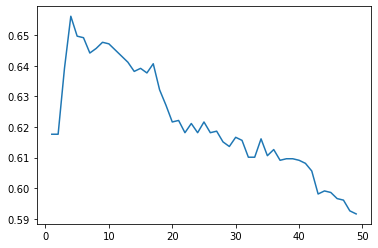

In [17]:
ks = [i for i in range(1,50)]
accs = []

for k in ks:
    KNNClassifier = KNeighborsClassifier(n_neighbors=k,weights='distance')  
    KNNClassifier.fit(X_train,y_train)
    y_pred_valid = KNNClassifier.predict(X_valid)
    accs.append(sklearn.metrics.accuracy_score(y_valid,y_pred_valid))
print("best accuracy k:",ks[np.argmax(accs)])
plt.plot(ks,accs)

In [18]:
#test
KNNClassifier = KNeighborsClassifier(n_neighbors=4,weights='distance')  
KNNClassifier.fit(X_train,y_train)
y_pred_test = KNNClassifier.predict(X_test)
print("Feature scaled/selected Test Accuracy:",sklearn.metrics.accuracy_score(y_test,y_pred_test))

Feature scaled/selected Test Accuracy: 0.6476476476476476
